# Analyse de données liées au journal de bord

In [1]:
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re

La première étape consiste à importer puis corriger les données.

In [2]:
# Importer donnees
data = np.genfromtxt('Q_06_latest-2024-2025_RR-T-Vent_filtered_Nice_20250801-26.csv', delimiter=';', names = True,
                     dtype=[('NUM_POSTE', '<i8'), ('NOM_USUEL', '<U10'), ('AAAAMMJJ', '<U10'), ('RR', '<f8'), ('TN', '<f8'), ('TX', '<f8'), ('TM', '<f8')])
data[:5,]

array([(6088001, '"NICE"', '20250801', 0., 20.8, 26.5, 24.1),
       (6088001, '"NICE"', '20250802', 0., 20.2, 27.8, 24.2),
       (6088001, '"NICE"', '20250803', 0., 21. , 27.4, 24.5),
       (6088001, '"NICE"', '20250804', 0., 22. , 27.2, 24.6),
       (6088001, '"NICE"', '20250805', 0., 21.7, 27.1, 24.6)],
      dtype=[('NUM_POSTE', '<i8'), ('NOM_USUEL', '<U10'), ('AAAAMMJJ', '<U10'), ('RR', '<f8'), ('TN', '<f8'), ('TX', '<f8'), ('TM', '<f8')])

In [3]:
# Corriger colonne NOM_USUEL
data['NOM_USUEL'] = [re.sub("\"", "", x) for x in data['NOM_USUEL']]
# Convertir colonne en date
data['AAAAMMJJ'] = [datetime.strptime(x, '%Y%m%d') for x in data['AAAAMMJJ']]
data[:5,]

array([(6088001, 'NICE', '2025-08-01', 0., 20.8, 26.5, 24.1),
       (6088001, 'NICE', '2025-08-02', 0., 20.2, 27.8, 24.2),
       (6088001, 'NICE', '2025-08-03', 0., 21. , 27.4, 24.5),
       (6088001, 'NICE', '2025-08-04', 0., 22. , 27.2, 24.6),
       (6088001, 'NICE', '2025-08-05', 0., 21.7, 27.1, 24.6)],
      dtype=[('NUM_POSTE', '<i8'), ('NOM_USUEL', '<U10'), ('AAAAMMJJ', '<U10'), ('RR', '<f8'), ('TN', '<f8'), ('TX', '<f8'), ('TM', '<f8')])

Il est temps de faire quelques statistiques de bases à partir de ces données.

In [4]:
print("Moyenne des températures minimales sur le mois d'août à", data['NOM_USUEL'][0], ":", round(np.mean(data['TN']), 1), "°C.")
print("Ecart-type =", round(np.std(data['TN'], ddof=1), 2))
print("Moyenne des températures maximales sur le mois d'août à", data['NOM_USUEL'][0], ":", round(np.mean(data['TX']), 1), "°C.")
print("Ecart-type =", round(np.std(data['TX'], ddof=1), 2))
print("Moyenne des précipitations sur le mois d'août à", data['NOM_USUEL'][0], ":", round(np.mean(data['RR']), 1), "mm.")
print("Ecart-type =", round(np.std(data['RR'], ddof=1), 2))
print("Plus fort taux de précipitations pour le mois d'août à", data['NOM_USUEL'][0], ":", data['RR'].max(), "mm.")
indices = np.where(data['RR'] == data['RR'].max())
print("Plus fort taux de précipitations le", data[indices]['AAAAMMJJ'][0], ".")

Moyenne des températures minimales sur le mois d'août à NICE : 23.4 °C.
Ecart-type = 2.81
Moyenne des températures maximales sur le mois d'août à NICE : 29.9 °C.
Ecart-type = 3.09
Moyenne des précipitations sur le mois d'août à NICE : 0.6 mm.
Ecart-type = 2.67
Plus fort taux de précipitations pour le mois d'août à NICE : 13.0 mm.
Plus fort taux de précipitations le 2025-08-20 .


Maintenant nous allons pouvoir visualiser ces données météo.

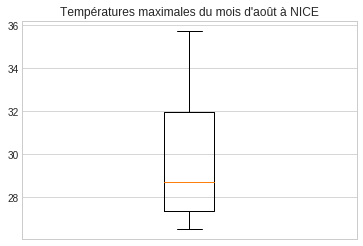

Avec Q1 = 27.35 , Q2 = 28.7 , Q3 = 31.95


In [5]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.boxplot(data['TX'])
plt.title("Températures maximales du mois d'août à " + data['NOM_USUEL'][0])
plt.xticks([])
plt.show()
print("Avec Q1 =", round(np.quantile(data['TX'], 0.25), 2), ", Q2 =", round(np.quantile(data['TX'], 0.5), 2), ", Q3 =", round(np.quantile(data['TX'], 0.75), 2))

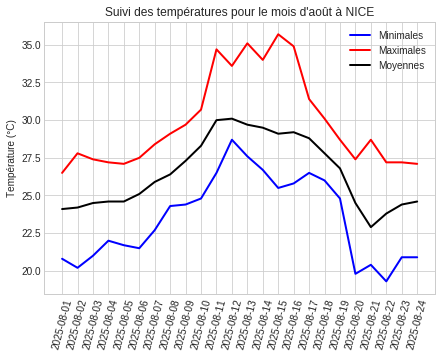

In [6]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (7,5))
l1 = ax.plot(data['AAAAMMJJ'], data['TN'], color = 'blue', linewidth = 2, label = 'Minimales') 
l2 = ax.plot(data['AAAAMMJJ'], data['TX'], color = 'red', linewidth = 2, label = 'Maximales')
l3 = ax.plot(data['AAAAMMJJ'], data['TM'], color = 'black', linewidth = 2, label = 'Moyennes')
ax.tick_params(axis = 'x', labelrotation = 75)
ax.set_ylabel('Température (°C)')
ax.legend()
plt.title("Suivi des températures pour le mois d'août à " + data['NOM_USUEL'][0])
plt.show()